Link to data:  https://www.kaggle.com/datasets/shwetabh123/mall-customers?datasetId=7721

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [ ]:
dataset = pd.read_csv('C:\\Users\\20100\\Desktop\\new\\Mall_Customers.csv')

dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
dataset.shape

(200, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values


In [ ]:
import numpy as np

def kmeans(X, k, max_iterations=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for iteration in range(max_iterations):
        # Assign each data point to its nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        cluster_assignments = np.argmin(distances, axis=0)
        
        # Update the centroids to be the mean of their assigned data points
        for cluster in range(k):
            centroids[cluster] = X[cluster_assignments == cluster].mean(axis=0)
    
    return centroids, cluster_assignments

In [ ]:
centroids, cluster_assignments = kmeans(X, k=3)

# Print the results
print("Centroids:")
print(centroids)
print("Cluster assignments:")
print(cluster_assignments)

Centroids:
[[57 63]
 [28 23]
 [89 23]]
Cluster assignments:
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 2 2 2 2 2]


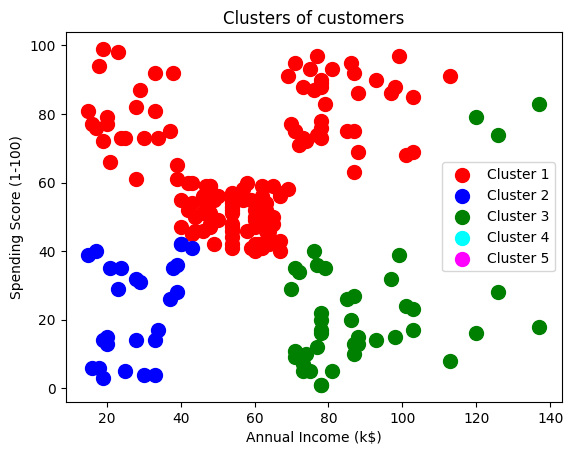

In [ ]:
plt.scatter(X[cluster_assignments == 0, 0], X[cluster_assignments == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[cluster_assignments == 1, 0], X[cluster_assignments == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[cluster_assignments == 2, 0], X[cluster_assignments == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[cluster_assignments == 3, 0], X[cluster_assignments == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[cluster_assignments == 4, 0], X[cluster_assignments == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
